In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

import tensorflow as tf
from keras.utils import to_categorical
from keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Dropout

In [3]:
#how many classes we have in train
files = []
path = "../input/gtsrb-german-traffic-sign/Train"
for file in os.listdir(path):
    files.append(file)
    
print(len(files))

FileNotFoundError: [WinError 3] The system cannot find the path specified: '../input/gtsrb-german-traffic-sign/Train'

In [4]:
#how many classes we have in train
files = []
path = "E:\gtsrb-german-traffic-sign\Train"
for file in os.listdir(path):
    files.append(file)
    
print(len(files))

43


In [5]:
from PIL import Image

In [6]:
from PIL import Image
imgs_path = "E:\gtsrb-german-traffic-sign\Train"
data = []
labels = []
classes = 43

for i in range(43):
    p = os.path.join(imgs_path, str(i)) #0-42
    #print(p)
    for img in os.listdir(p):
        im = Image.open(p + '/' + img)
        im = im.resize((30,30))
        im = np.array(im)
        data.append(im)
        labels.append(i)
        
data = np.array(data)
labels = np.array(labels)
print("success")

success


In [7]:
#what we done, see an sample example
i0 = "E:\gtsrb-german-traffic-sign\Train\0\00000_00004_00029.png"
i = Image.open(i0)
i = i.resize((30, 30))
sr = np.array(i)  #it is a matrix of shape (30,30,3)
plt.imshow(i)
plt.show()

ValueError: embedded null character

In [8]:
#what we done, see an sample example
i0 = "E:\gtsrb-german-traffic-sign\Train\0\00000_00004_00029.png"
i = Image.open(i0)
i = i.resize((30, 30))
sr = np.array(i)  #it is a matrix of shape (30,30,3)
plt.imshow(i)
plt.show()

ValueError: embedded null character

In [9]:
#what we done, see an sample example
i0 = "E:\\gtsrb-german-traffic-sign\Train\0\00000_00004_00029.png"
i = Image.open(i0)
i = i.resize((30, 30))
sr = np.array(i)  #it is a matrix of shape (30,30,3)
plt.imshow(i)
plt.show()

ValueError: embedded null character

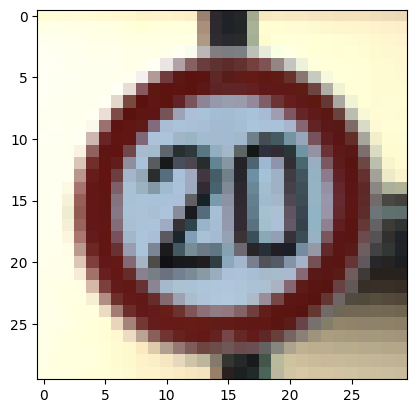

In [10]:
#what we done, see an sample example
i0 = "E:\gtsrb-german-traffic-sign/Train/0/00000_00004_00029.png"
i = Image.open(i0)
i = i.resize((30, 30))
sr = np.array(i)  #it is a matrix of shape (30,30,3)
plt.imshow(i)
plt.show()

In [11]:
print(data.shape)
print(labels.shape)

(39209, 30, 30, 3)
(39209,)


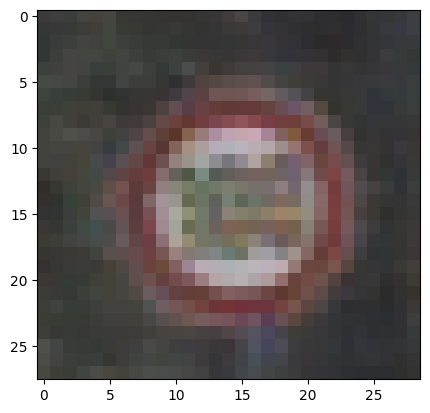

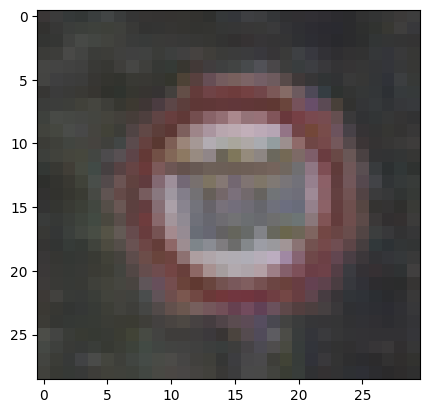

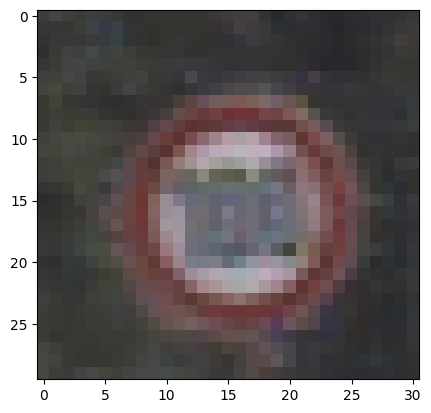

In [12]:
#see any random image
ipath = "E:\gtsrb-german-traffic-sign/Train/7"
imgs = os.listdir(ipath)
for ip in imgs[5:8]:
    im = Image.open(ipath +'/'+ip)
    plt.imshow(im)
    plt.show()

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print("training shape: ",x_train.shape, y_train.shape)
print("testing shape: ",x_test.shape, y_test.shape)

y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

training shape:  (31367, 30, 30, 3) (31367,)
testing shape:  (7842, 30, 30, 3) (7842,)


In [14]:
#after onehot encoding we can see the shape of output labels.
print(y_train.shape, y_test.shape)

(31367, 43) (7842, 43)


In [15]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Activation, Flatten, Dropout
from keras.layers import Dense

In [16]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation="relu", input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation="softmax"))

In [17]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [18]:
epochs = 15
history = model.fit(x_train, y_train, epochs=epochs, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/15
491/491 [==============================] - 36s 71ms/step - loss: 2.3342 - accuracy: 0.3834 - val_loss: 1.1389 - val_accuracy: 0.7062
Epoch 2/15
491/491 [==============================] - 35s 71ms/step - loss: 1.0194 - accuracy: 0.6968 - val_loss: 0.4395 - val_accuracy: 0.8803
Epoch 3/15
491/491 [==============================] - 36s 74ms/step - loss: 0.6584 - accuracy: 0.7997 - val_loss: 0.2540 - val_accuracy: 0.9285
Epoch 4/15
491/491 [==============================] - 36s 74ms/step - loss: 0.5088 - accuracy: 0.8458 - val_loss: 0.2119 - val_accuracy: 0.9371
Epoch 5/15
491/491 [==============================] - 35s 70ms/step - loss: 0.4359 - accuracy: 0.8673 - val_loss: 0.1366 - val_accuracy: 0.9638
Epoch 6/15
491/491 [==============================] - 35s 71ms/step - loss: 0.3527 - accuracy: 0.8940 - val_loss: 0.1137 - val_accuracy: 0.9703
Epoch 7/15
491/491 [==============================] - 34s 70ms/step - loss: 0.2866 - accuracy: 0.9139 - val_loss: 0.1078 - val_accuracy:

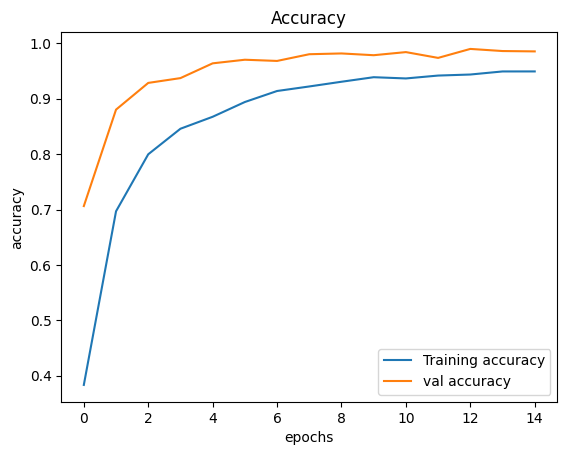

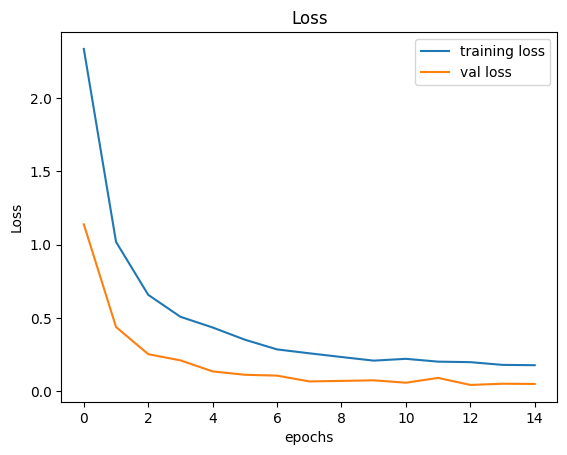

In [19]:
plt.figure(0)
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="val accuracy")
plt.title("Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label="training loss")
plt.plot(history.history['val_loss'], label="val loss")
plt.title("Loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [20]:
from sklearn.metrics import accuracy_score
import pandas as pd
test = pd.read_csv("../input/gtsrb-german-traffic-sign/Test.csv")
print(test.shape)
test.head()

FileNotFoundError: [Errno 2] No such file or directory: '../input/gtsrb-german-traffic-sign/Test.csv'

In [21]:
from sklearn.metrics import accuracy_score
import pandas as pd
test = pd.read_csv("test_labels = test['ClassId'].values
test_img_path = "../input/gtsrb-german-traffic-sign"
test_imgs = test['Path'].values

test_data = []
test_labels = []

for img in test_imgs:
    im = Image.open(test_img_path + '/' + img)
    im = im.resize((30,30))
    im = np.array(im)
    test_data.append(im)

test_data = np.array(test_data)
print(test_data.shape)/Test.csv")
print(test.shape)
test.head()

(12630, 8)


,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [22]:
test_labels = test['ClassId'].values
test_img_path = "E:\gtsrb-german-traffic-sign"
test_imgs = test['Path'].values

test_data = []
test_labels = []

for img in test_imgs:
    im = Image.open(test_img_path + '/' + img)
    im = im.resize((30,30))
    im = np.array(im)
    test_data.append(im)

test_data = np.array(test_data)
print(test_data.shape)

(12630, 30, 30, 3)


In [23]:
import warnings
warnings.filterwarnings("ignore")
test_labels = test['ClassId'].values
test_labels

array([16,  1, 38, ...,  6,  7, 10], dtype=int64)

In [26]:
#predict the output on test data
predictions = (model.predict(test_data) > 0.5).astype("int32")
print("accuracy: ", accuracy_score(test_labels, predictions))

395/395 [==============================] - 4s 9ms/step


ValueError: Classification metrics can't handle a mix of multiclass and multilabel-indicator targets

In [27]:
#predict the output on test data
predictions = model.predict(test_data)
print("accuracy: ", accuracy_score(test_labels, predictions))

395/395 [==============================] - 3s 9ms/step


ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

In [28]:
#predict the output on test data
predictions = np.argmax(model.predict(test_data),axis=1)
print("accuracy: ", accuracy_score(test_labels, predictions))

395/395 [==============================] - 3s 9ms/step
accuracy:  0.9584323040380047


In [29]:
model.save('traffic_classifier.h5')

In [36]:
from tkinter import filedialog
from tkinter import *
import tkinter as tk
from PIL import ImageTk, Image
from keras.models import load_model
import numpy as np
#load the trained model to classify traffic signs
model = load_model('traffic_classifier.h5')
#dictionary to label all traffic signs class.
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)',
            3:'Speed limit (50km/h)',
            4:'Speed limit (60km/h)',
            5:'Speed limit (70km/h)',
            6:'Speed limit (80km/h)',
            7:'End of speed limit (80km/h)',
            8:'Speed limit (100km/h)',
            9:'Speed limit (120km/h)',
            10:'No passing',
            11:'No passing veh over 3.5 tons',
            12:'Right-of-way at intersection',
            13:'Priority road',
            14:'Yield',
            15:'Stop',
            16:'No vehicles',
            17:'Veh > 3.5 tons prohibited',
            18:'No entry',
            19:'General caution',
            20:'Dangerous curve left',
            21:'Dangerous curve right',
            22:'Double curve',
            23:'Bumpy road',
            24:'Slippery road',
            25:'Road narrows on the right',
            26:'Road work',
            27:'Traffic signals',
            28:'Pedestrians',
            29:'Children crossing',
            30:'Bicycles crossing',
            31:'Beware of ice/snow',
            32:'Wild animals crossing',
            33:'End speed + passing limits',
            34:'Turn right ahead',
            35:'Turn left ahead',
            36:'Ahead only',
            37:'Go straight or right',
            38:'Go straight or left',
            39:'Keep right',
            40:'Keep left',
            41:'Roundabout mandatory',
            42:'End of no passing',
            43:'End no passing veh > 3.5 tons' }
#initialize GUI
top=tk.Tk()
top.geometry('800x600')
top.title('Traffic sign classification')
top.configure(background='#CDCDCD')
label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)
def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((30,30))
    image = np.expand_dims(image, axis=0)
    image = np.array(image)
    pred = np.argmax(model.predict([image])[0])
    sign = classes[pred+1]
    print(sign)
    label.configure(foreground='#011638', text=sign)
def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)
def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),(top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass
upload=Button(top,text="Upload an image",command=upload_image,padx=10,pady=5)
upload.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="Know Your Traffic Sign",pady=20, font=('arial',20,'bold'))
heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()

1/1 [==============================] - 0s 72ms/step
Speed limit (30km/h)
1/1 [==============================] - 0s 21ms/step
General caution
1/1 [==============================] - 0s 22ms/step
Ahead only
1/1 [==============================] - 0s 22ms/step
Speed limit (50km/h)
